# Pymaceuticals Inc.
---

## Overview

This project analyzes and visualizes drug treatment data to evaluate the effectiveness of potential cancer treatments, particularly for squamous cell carcinoma (SCC). Using **Matplotlib**, plots and summaries are generated based on a 45-day animal study conducted by **Pymaceuticals, Inc.**
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Define data file paths
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merge_df = pd.merge(study_results,mouse_metadata,how='left',on='Mouse ID')

# Display the data table for preview
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = len(merge_df.groupby(['Mouse ID'])['Mouse ID'])
mouse_count

249

In [3]:
# The data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = list(merge_df[(merge_df.duplicated(['Mouse ID','Timepoint']) == True)]['Mouse ID'].unique())
duplicate_mice = ''.join(duplicate_mice)
duplicate_mice


'g989'

In [4]:
# Get all the data for the duplicate mouse ID.
duplicate_mice_df = merge_df[(merge_df['Mouse ID'] == duplicate_mice)]
duplicate_mice_df = merge_df.loc[merge_df['Mouse ID'] == duplicate_mice]
duplicate_mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[(merge_df['Mouse ID'] != duplicate_mice)]
clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_df.groupby(['Mouse ID'])['Mouse ID'])
clean_mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
median_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
variance_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
st_dev_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
error_tumor_volume = clean_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_df = pd.DataFrame({'Mean Tumor Volume': mean_tumor_volume,
                       'Median Tumor Volume': median_tumor_volume,
                       'Tumor Volume Variance': variance_tumor_volume,
                       'Tumor Volume Std. Dev.': st_dev_tumor_volume,
                       'Tumor Volume Std. Err.': error_tumor_volume,
                        })
drug_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Producing the same summary statistics using the aggregation method
aggregate_df=clean_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean', 'median', 'max','var','std','sem']})
aggregate_df

Tumor Volume (mm3)                                             \
                           mean     median        max        var       std   
Drug Regimen                                                                 
Capomulin             40.675741  41.557809  48.158209  24.947764  4.994774   
Ceftamin              52.591172  51.776157  68.923185  39.290177  6.268188   
Infubinol             52.884795  51.820584  72.226731  43.128684  6.567243   
Ketapril              55.235638  53.698743  78.567014  68.553577  8.279709   
Naftisol              54.331565  52.509285  76.668817  66.173479  8.134708   
Placebo               54.033581  52.288934  73.212939  61.168083  7.821003   
Propriva              52.320930  50.446266  72.455421  43.852013  6.622085   
Ramicane              40.216745  40.673236  47.622816  23.486704  4.846308   
Stelasyn              54.233149  52.431737  75.123690  59.450562  7.710419   
Zoniferol             53.236507  51.818479  73.324432  48.533355  6.966589   

                        
                   sem  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.544332  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

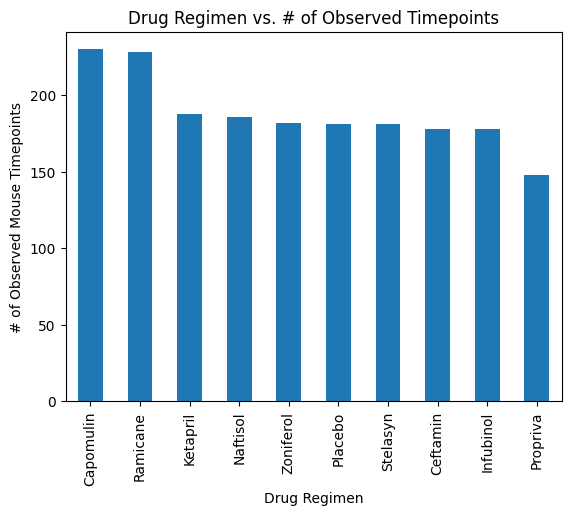

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False).plot(kind='bar')

# Plot Title and Labeling
plt.title('Drug Regimen vs. # of Observed Timepoints')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# Display the plot
plt.show()

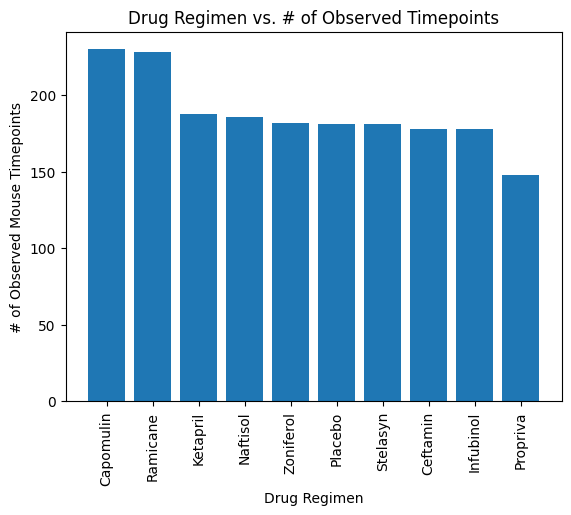

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_df = clean_df.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
plt.bar(drug_df.index,drug_df)

# Plot Title and Labeling
plt.title('Drug Regimen vs. # of Observed Timepoints')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(rotation=90)

# Display the plot
plt.show()

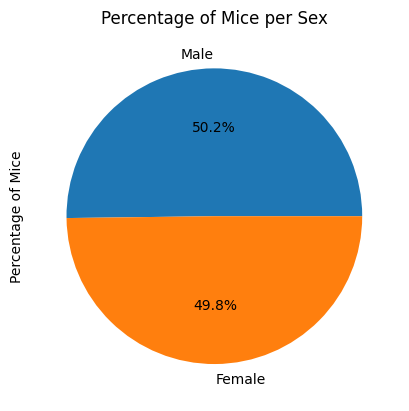

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_df = merge_df.groupby(['Sex'])['Mouse ID'].nunique().sort_values(ascending = False)
sex_df.plot(kind='pie', autopct='%1.1f%%')

# Plot Title and Labeling
plt.title('Percentage of Mice per Sex')
plt.ylabel('Percentage of Mice')

# Display the plot
plt.show()

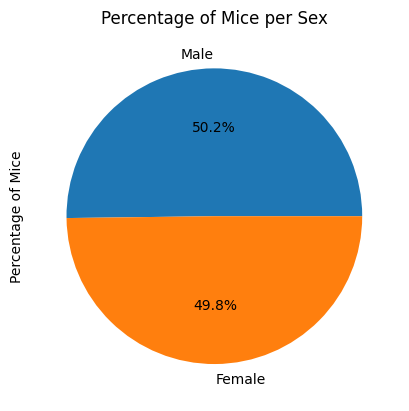

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
plt.pie(sex_df, labels = sex_df.index, autopct='%1.1f%%')

# Plot Title and Labeling
plt.title('Percentage of Mice per Sex')
plt.ylabel('Percentage of Mice')

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs_df = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') | (clean_df['Drug Regimen'] == 'Ramicane') | (clean_df['Drug Regimen'] == 'Infubinol') |(clean_df['Drug Regimen'] == 'Ceftamin')]

# Identify the last (greatest) timepoint for each mouse
timepoint_max = four_drugs_df.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the DataFrame of the four treatments to get the tumor volume at the last timepoint
merge_df = pd.merge(timepoint_max,four_drugs_df,on = ['Mouse ID','Timepoint'],how = 'left').set_index(['Mouse ID'])[['Drug Regimen','Tumor Volume (mm3)']]
merge_df

,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
a203,Infubinol,67.973419
a251,Infubinol,65.525743
a275,Ceftamin,62.999356
a411,Ramicane,38.407618
a444,Ramicane,43.047543
...,...,...
y769,Ceftamin,68.594745
y793,Capomulin,31.896238
y865,Ceftamin,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Generate the tumor data per treatment
for treatment in treatments:
    tumor_data.append(merge_df[(merge_df['Drug Regimen'] == treatment)]['Tumor Volume (mm3)'].to_list())

# Calculate the IQR and quantitatively determine if there are any potential outliers.    
    quartiles = merge_df[(merge_df['Drug Regimen'] == treatment)]['Tumor Volume (mm3)'].quantile([0.25,0.5,0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    print(treatment)
    print(f"The lower quartile of tumor volume after {treatment} regimen is: {lower_quartile}")
    print(f"The upper quartile of tumor volume after {treatment} regimen is: {upper_quartile}")
    print(f"The interquartile range of tumor volume after {treatment} regimen is: {iqr}")
    print(f"The the median of tumor volume after {treatment} regimen is: {quartiles[0.5]} ")

# Determine outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5*iqr)
    upper_bound = upper_quartile + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers. \n")

Capomulin
The lower quartile of tumor volume after Capomulin regimen is: 32.37735684
The upper quartile of tumor volume after Capomulin regimen is: 40.1592203
The interquartile range of tumor volume after Capomulin regimen is: 7.781863460000004
The the median of tumor volume after Capomulin regimen is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers. 

Ramicane
The lower quartile of tumor volume after Ramicane regimen is: 31.56046955
The upper quartile of tumor volume after Ramicane regimen is: 40.65900627
The interquartile range of tumor volume after Ramicane regimen is: 9.098536719999998
The the median of tumor volume after Ramicane regimen is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers. 

Infubinol
The lower quartile of tumor volume after Infubinol regimen is: 54.04860769
The upper quartile of tumor volume after Infubinol regimen is: 65.52574285
The interquartile 

C:\Users\riley\AppData\Local\Temp\ipykernel_31580\2816568260.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(treatments)


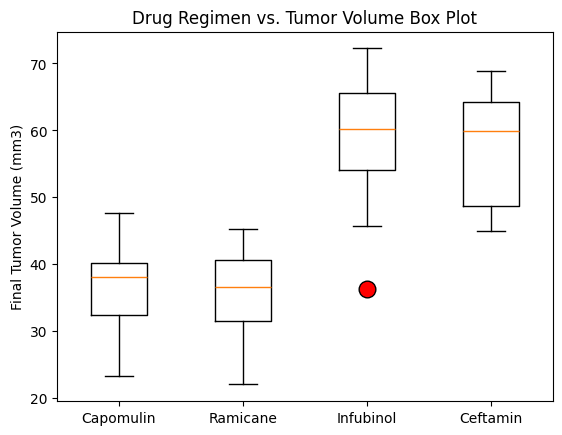

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

# Plot Title and Labeling
plt.title('Drug Regimen vs. Tumor Volume Box Plot')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)


ax1.boxplot(tumor_data,flierprops = dict(marker='o', markerfacecolor='red', markersize=12,  markeredgecolor='black'))

# Display the plot
plt.show()

## Line and Scatter Plots

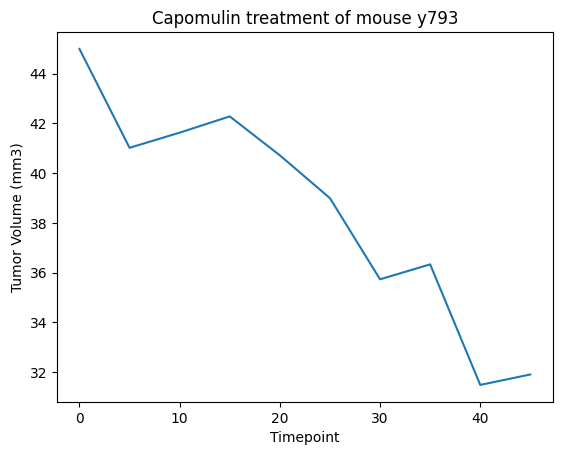

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Define mouse
mouse = 'y793'

# Generate df containing information of selected mouse
mouse_df = clean_df[(clean_df['Mouse ID'] == mouse)].set_index(['Timepoint'])['Tumor Volume (mm3)']
mouse_df

# Line plot creation
mouse_df.plot(kind = 'line')

# Plot Title and Labeling
plt.title(f'Capomulin treatment of mouse {mouse}')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

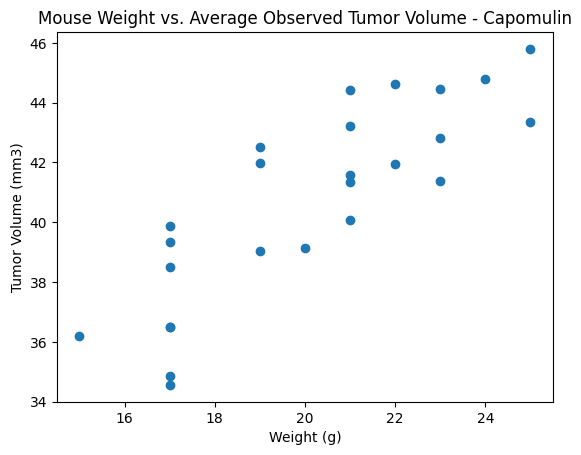

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Generate df containing information of mice undergoing Capomulin regimen
capomulin = clean_df[(clean_df['Drug Regimen'] == 'Capomulin')]

# Define mouse weight and average tumor volume series for scatter plot
avg_tumor_volume = capomulin.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean()
mouse_weight = [indice[1] for indice in avg_tumor_volume.index]

# Scatter plot creation
plt.plot(mouse_weight,avg_tumor_volume, 'o')

# Plot Title and Labeling
plt.title(f'Mouse Weight vs. Average Observed Tumor Volume - Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume for the Capomulin regimen is 0.84


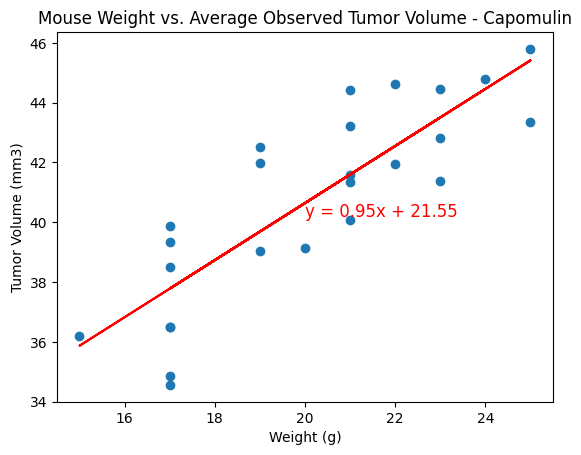

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Calculation of the correlation coefficient using the scipy module
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume for the Capomulin regimen is {round(correlation[0],2)}')

# Definition of variables required for linear regression model using the scipy module.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_volume)

# Definition of regression values using map function.
regress_values = list(map(lambda x: x*slope +intercept,mouse_weight))

# Definition of linear regression equation in str format
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot with linear regression equation annotation.
plt.plot(mouse_weight,avg_tumor_volume, 'o')
plt.plot(mouse_weight,regress_values,"r-")
plt.annotate(line_eq,((max(mouse_weight) - min(mouse_weight))/2 + min(mouse_weight),(max(avg_tumor_volume) - min(avg_tumor_volume))/2 + min(avg_tumor_volume)),fontsize=12,color="red")

# Plot Title and Labeling
plt.title(f'Mouse Weight vs. Average Observed Tumor Volume - Capomulin')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

# Display the plot
plt.show()